# Major Steps in a ML Project

1. Import the Data
2. Cleaning of Data
3. Split of Data into Training and Test Set
4. Creating a model
5. Train model
6. Make Predictions/Testing
7. Evaluate and Improve

# Step 1: Importing Data

In [1]:
# Import data
import pandas as pd
df = pd.read_csv('data.csv')
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


# Step 2 Cleaning Data

In [2]:
# we donot have null or outliars in our data but we need to 
# divide our data into features and classes seprate sets
# Import data
X = df.drop(columns=['genre'])
y = df['genre']

# X has features
# y has classes

In [3]:
X # features

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [4]:
y # classes

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

# Step 3: Split data into Training/Test Sets
For splitting we can use train_test_split module available in python

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8)

# Step 4 Create a model

we want classfication, so we can use python DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [7]:
# Now we have our model in model variable
type(model)

sklearn.tree._classes.DecisionTreeClassifier

# Step 5: Train the model

we can use builtin method i.e "fit" available in DecisionTreeClassifer for training

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 6: Make Predictions

In [9]:
X_test # dataset having input values for testing

,age,gender
2,25,1
3,26,1
16,34,0
0,20,1
11,25,0
9,20,0
10,21,0
12,26,0
8,37,1
4,29,1


In [10]:
predicted_output = model.predict(X_test)

In [11]:
predicted_output

array(['HipHop', 'HipHop', 'Classical', 'HipHop', 'HipHop', 'HipHop',
       'HipHop', 'HipHop', 'Classical', 'Acoustic', 'Acoustic',
       'Acoustic', 'Classical', 'Acoustic', 'Acoustic'], dtype=object)

# Step 7: Evaluate and Improve

For Evaluation we can use sklearn module accuracy score

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
score = accuracy_score(y_test, predicted_output) # return accuracy score b/w 0 and 1
score

0.4

# Putting all code at one place

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # for splitting datasets
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')
X = df.drop(columns=['genre'])
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) # 0.2 mean 20%
# this will return 4 tuple first 2 for input sets(training and testing)
# other 2 for output sets (training and testing)

model = DecisionTreeClassifier()
model.fit(X_train, y_train) # fit takes input and output parameters (training)
predicted_output = model.predict(X_test) # this method takes 2D array

score = accuracy_score(y_test, predicted_output) # return accuracy score b/w 0 and 1
score

1.0

In [ ]:
# You can change value of test_size variable to see how changing
# size of data impacts the accuracy of our model
# test_size 0.2 meansonline d 20 % for testing and 80% for training(ideal) and
# test_size 0.8 means 80% for testing and 20% for training (not ideal)

# Extra: Visualization

In order to visualize this how our model is working we can use tree module

In [ ]:
# Now we will export our model in visual form so we
# know it is making predictions
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

df = pd.read_csv('data.csv')
X = df.drop(columns=['genre'])
y = df['genre']

model = DecisionTreeClassifier()
model.fit(X, y)

tree.export_graphviz(model, out_file='music-recommender.dot',
                    feature_names=['age', 'gender'],
                    class_names=sorted(y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

In [ ]:
# this will ouput a file in the current directory 
# named as music-recommender.dot

You can open it and paste it's code on this link to check the visualization: https://dreampuf.github.io/GraphvizOnline/

In [ ]:
#Copy the below code and paste it on the upper link:
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="age <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]\nclass = Classical", fillcolor="#e5fad7"] ;
1 [label="age <= 25.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]\nclass = Acoustic", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 3, 3, 0]\nclass = Dance", fillcolor="#ffffff"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance", fillcolor="#39e5c5"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop", fillcolor="#3c39e5"] ;
2 -> 4 ;
5 [label="gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 0, 0, 3]\nclass = Acoustic", fillcolor="#ffffff"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic", fillcolor="#e58139"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz", fillcolor="#e539c0"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = Classical", fillcolor="#7be539"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}

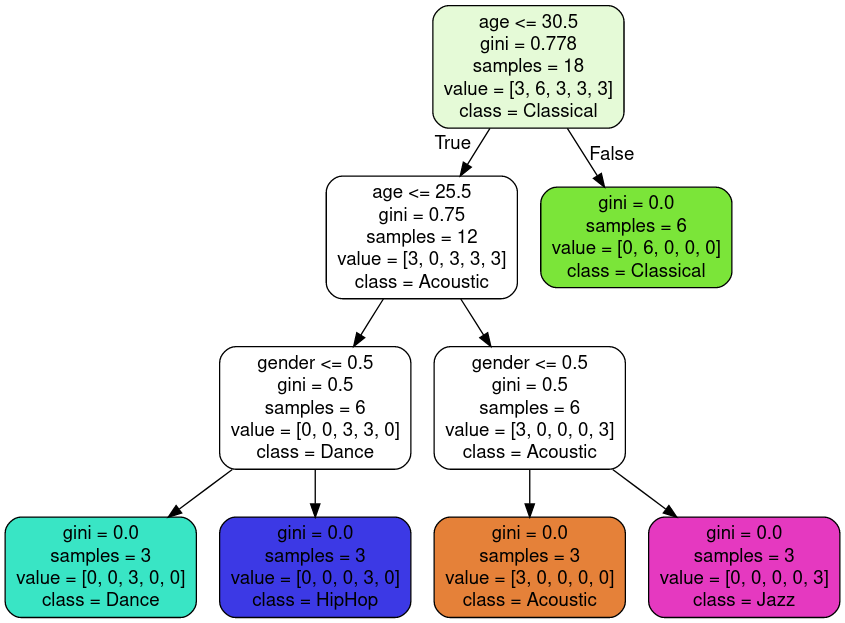